# Satellite orbit propagation

This tutorial shows how to use a simple orbit propagation with 2 cases : SGP4 propagator (slow) and circle propagator (quick). The circle propagator makes the satellite move on a perfect circle at a constant angular rate.

## Preparation
We import the necessary libraries

In [1]:
from datetime import datetime, timezone
import os

import numpy as np

from blocksim.Simulation import Simulation
from blocksim.satellite.Satellite import (
    SGP4Satellite,
    CircleSatellite,
    createSatellites,
)
from blocksim.satellite.Trajectory import Trajectory

[06/28/23 10:54:28] INFO     Registered blocksim.loggers.CSVLogger                                  ]8;id=875400;file:///home/yannbdt/repos/blocksim/blocksim/__init__.py\__init__.py]8;;\:]8;id=554375;file:///home/yannbdt/repos/blocksim/blocksim/__init__.py#179\179]8;;\

                    INFO     Registered blocksim.loggers.PickleLogger                               ]8;id=696391;file:///home/yannbdt/repos/blocksim/blocksim/__init__.py\__init__.py]8;;\:]8;id=830471;file:///home/yannbdt/repos/blocksim/blocksim/__init__.py#179\179]8;;\

                    INFO     Registered blocksim.loggers.XlsLogger                                  ]8;id=780020;file:///home/yannbdt/repos/blocksim/blocksim/__init__.py\__init__.py]8;;\:]8;id=353878;file:///home/yannbdt/repos/blocksim/blocksim/__init__.py#179\179]8;;\

## Satellite creation
We create the satellites from a TLE file. The 2 propagators are used, and we modify the name of the read satellites to prefix it with the type of propagator used. Otherwise, the simulation will reject duplicate names.

In [2]:
t0 = datetime(year=2022, month=2, day=3, hour=12, minute=0, second=0, tzinfo=timezone.utc)
sats_sgp4 = createSatellites(
    tle_file=os.getcwd() + "/../tests/TLE/gs1_gs2.tle",
    tsync=t0,
    prop=SGP4Satellite,
    name_prefix="sgp4",
)
sats_circle = createSatellites(
    tle_file=os.getcwd() + "/../tests/TLE/gs1_gs2.tle",
    tsync=t0,
    prop=CircleSatellite,
    name_prefix="circle",
)

## Simulation
We run the simulation

In [3]:
sim = Simulation(*(sats_sgp4 + sats_circle))
ns = 200
tps = np.linspace(0, 5 * 60, ns)
sim.simulate(tps, progress_bar=False)

## Plotting
We plot the trajetcories : in thick red SGP4 and in thin blue the circle propagator

In [4]:
log = sim.getLogger()

In [5]:
from blocksim.graphics.BFigure import FigureFactory
from blocksim.graphics.GraphicSpec import AxeProjection

fig = FigureFactory.create()
gs = fig.add_gridspec(1, 1)
axe = fig.add_baxe(title="", spec=gs[0, 0], projection=AxeProjection.PLATECARREE)

In [6]:
for s in sats_sgp4:
    traj = s.getTrajectoryFromLogger(log)
    axe.plot(traj, linewidth=4)

In [7]:
for s in sats_circle:
    traj = s.getTrajectoryFromLogger(log)
    axe.plot(traj)

We can see a good correlation between the 2 types of propagators.

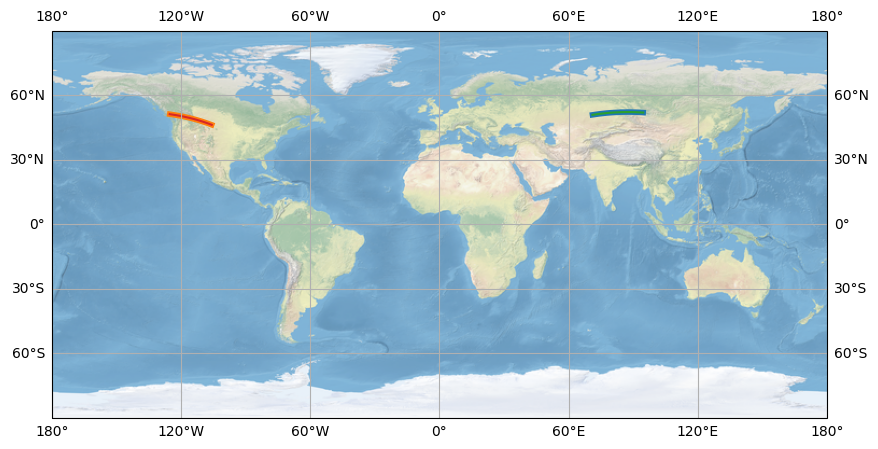

In [8]:
mfig = fig.render()